In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras import layers,utils,losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Input, Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.models import Model
import seaborn as sns
import tensorflow as tf
import warnings 
import os
import datetime
import h5py
import csv
import math
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
warnings.filterwarnings('ignore')


In [2]:
dataframe = pd.read_csv('DATA.csv', parse_dates = ['Date'], index_col = ['Date'])

In [3]:
dataframe.shape

(628, 279)

In [4]:
dataframe.head()

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
Date,,,,,,,,,,,,,,,,,,,,,
1959-07-01,0.001637,0.000484,0.014131,-0.008907,0.004234,-0.009018,-0.003428,-0.001147,0.001152,-0.019968,...,-42.131013,-45.366858,-38.408155,-4.568686,-17.892735,-28.905355,0.839706,-9.275758,-7.583914,-36.179972
1959-08-01,0.003220,0.003382,0.015212,0.006529,0.026893,-0.007960,0.002285,0.001147,0.006879,-0.001184,...,-76.934335,-7.100969,-45.366858,-15.823874,-11.454495,-60.668068,-8.913019,-17.649155,-144.704356,-7.342417
1959-09-01,0.002126,0.002072,-0.020160,-0.018769,-0.026248,-0.001140,0.005692,0.006869,0.005698,0.009454,...,81.302522,-27.553934,-14.244207,65.385822,64.476387,5.507343,22.821607,19.756471,62.427634,-45.491488
1959-10-01,0.000271,-0.000722,-0.000353,0.001956,0.006627,-0.012652,-0.011417,-0.011470,-0.006839,-0.010645,...,-11.212218,23.410160,115.135609,26.700731,29.865259,44.292425,17.984556,9.442750,116.987545,57.519185
1959-11-01,0.000813,0.000963,0.001961,-0.006245,-0.010304,-0.003480,-0.005758,-0.005785,-0.009198,-0.038794,...,25.761488,-23.386412,-27.308385,-60.541852,-27.431153,-23.753553,-20.819566,5.029446,9.085519,-19.111381


In [5]:
dataframe.tail(10)

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0.001384,0.001983,0.005470,-0.001535,0.010009,0.002074,0.002443,0.002565,0.001274,0.008683,...,-107.647096,-68.392466,-82.191596,-46.239540,-92.646085,-53.620329,-38.779922,-62.562905,-126.565960,-87.471991
2011-02-01,0.003713,0.005068,0.001869,0.011928,0.008898,0.005904,0.004371,0.006189,0.002978,0.021298,...,182.028616,110.329048,84.550156,96.568061,106.711451,110.110110,117.640488,116.987545,171.569003,104.073604
2011-03-01,-0.000305,-0.000053,-0.000399,-0.001138,0.003748,0.001631,-0.003015,-0.002586,-0.007355,-0.014927,...,24.939047,-5.412187,-15.580713,-17.040419,14.669964,16.446776,16.920149,38.960628,-21.674571,17.275056
2011-04-01,0.003544,0.003154,0.001085,0.008413,0.001709,0.008540,0.006838,0.004438,0.003779,0.019219,...,16.801824,38.495872,1.678825,-7.946252,1.678825,24.116042,7.774759,38.379655,40.121731,59.005253
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataframe.drop(dataframe.index[[622,623,624,625,626,627]], inplace = True)

In [7]:
dataframe.tail(10)

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-01,0.000632,0.000953,0.001858,0.011223,-0.000820,0.008205,0.003973,0.002870,0.004189,0.020977,...,16.920149,5.746220,-16.431993,4.073080,-9.880566,-22.041189,3.355305,6.462567,20.818366,17.156766
2010-08-01,-0.001158,-0.001853,-0.000565,-0.008698,-0.002509,-0.004535,-0.003197,-0.003552,-0.003496,-0.030953,...,28.342639,31.970317,17.748103,30.450368,58.776747,55.687647,44.986133,51.556439,2.517358,29.631135
2010-09-01,-0.000334,-0.000365,0.000151,-0.000372,-0.002108,0.003329,0.007350,0.007385,0.005528,0.010414,...,1.199400,-51.489001,3.714246,-0.480096,0.359946,-28.168027,-45.491488,-29.766143,-15.094539,0.359946
2010-10-01,0.002254,0.001885,-0.000786,0.008344,0.006852,0.001381,-0.001104,-0.000793,-0.000861,-0.004580,...,1.319275,-39.895913,-68.773640,-9.638606,-19.233313,-31.612770,-31.982437,-23.508780,-22.041189,-15.337601
2010-11-01,0.001138,0.003355,0.003920,0.002240,-0.001530,0.009198,0.009193,0.009218,0.010509,0.028832,...,-33.709056,-51.363747,-73.357200,53.623821,-44.743902,3.355305,-38.779922,-25.836142,-34.573298,-56.509929
2010-12-01,-0.001445,-0.000619,-0.001412,0.005688,-0.001319,0.002700,0.004600,0.005656,0.003034,0.008312,...,-84.120753,-69.409200,-58.776219,-38.160375,-46.239540,-26.817436,-51.489001,-114.228224,-104.500928,-39.895913
2011-01-01,0.001384,0.001983,0.005470,-0.001535,0.010009,0.002074,0.002443,0.002565,0.001274,0.008683,...,-107.647096,-68.392466,-82.191596,-46.239540,-92.646085,-53.620329,-38.779922,-62.562905,-126.565960,-87.471991
2011-02-01,0.003713,0.005068,0.001869,0.011928,0.008898,0.005904,0.004371,0.006189,0.002978,0.021298,...,182.028616,110.329048,84.550156,96.568061,106.711451,110.110110,117.640488,116.987545,171.569003,104.073604
2011-03-01,-0.000305,-0.000053,-0.000399,-0.001138,0.003748,0.001631,-0.003015,-0.002586,-0.007355,-0.014927,...,24.939047,-5.412187,-15.580713,-17.040419,14.669964,16.446776,16.920149,38.960628,-21.674571,17.275056


In [8]:
df = dataframe

In [9]:
df.shape

(622, 279)

In [10]:
dataframe2 = pd.read_csv('macrodata132.csv', parse_dates = ['Date'], index_col = ['Date'])

In [11]:
dataframe2.shape

(628, 132)

In [12]:
dataframe2.head()

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'CPI-U: ex shelter','CPI-U: ex med','PCE defl','PCE defl: dlbes','PCE defl: nondble','PCE defl: service','AHE: goods','AHE: const','AHE: mfg','Consumer expect'
Date,,,,,,,,,,,,,,,,,,,,,
1959-07-01,0.001637,0.000484,0.014131,-0.008907,0.004234,-0.009018,-0.003428,-0.001147,0.001152,-0.019968,...,0.00000,-0.003339,-0.000331,-0.002893,0.000847,-0.001227,-0.000020,0.030131,-0.004684,-2.0
1959-08-01,0.003220,0.003382,0.015212,0.006529,0.026893,-0.007960,0.002285,0.001147,0.006879,-0.001184,...,0.00321,0.003328,0.003242,0.002321,0.005317,0.001841,-0.004474,-0.068074,0.000000,-2.0
1959-09-01,0.002126,0.002072,-0.020160,-0.018769,-0.026248,-0.001140,0.005692,0.006869,0.005698,0.009454,...,-0.00001,-0.003328,-0.002894,-0.001052,-0.006863,-0.000156,0.000000,0.041620,0.000000,-2.0
1959-10-01,0.000271,-0.000722,-0.000353,0.001956,0.006627,-0.012652,-0.011417,-0.011470,-0.006839,-0.010645,...,-0.00320,0.000000,-0.000345,-0.000672,-0.000251,-0.000284,0.000000,-0.011429,0.000000,-0.4
1959-11-01,0.000813,0.000963,0.001961,-0.006245,-0.010304,-0.003480,-0.005758,-0.005785,-0.009198,-0.038794,...,0.00000,0.000000,0.001350,0.001387,0.002353,0.000553,0.000000,0.007547,0.000000,-0.3


In [13]:
dataframe2.tail(10)

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'CPI-U: ex shelter','CPI-U: ex med','PCE defl','PCE defl: dlbes','PCE defl: nondble','PCE defl: service','AHE: goods','AHE: const','AHE: mfg','Consumer expect'
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0.001384,0.001983,0.005470,-0.001535,0.010009,0.002074,0.002443,0.002565,0.001274,0.008683,...,-0.000571,-0.000699,-0.001042,-0.002593,-0.000924,-0.000869,-0.001450,-0.006323,0.001584,1.8
2011-02-01,0.003713,0.005068,0.001869,0.011928,0.008898,0.005904,0.004371,0.006189,0.002978,0.021298,...,-0.004752,-0.003289,-0.001595,0.003425,-0.008506,0.000052,0.001930,-0.000844,0.002635,2.3
2011-03-01,-0.000305,-0.000053,-0.000399,-0.001138,0.003748,0.001631,-0.003015,-0.002586,-0.007355,-0.014927,...,0.001916,0.001329,0.000811,-0.002038,0.003206,0.000417,-0.002894,-0.000003,-0.004216,3.2
2011-04-01,0.003544,0.003154,0.001085,0.008413,0.001709,0.008540,0.006838,0.004438,0.003779,0.019219,...,-0.001209,-0.000885,-0.000208,0.000278,-0.002859,0.000669,0.003373,0.004639,0.003158,8.7
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dataframe2.drop(dataframe2.index[[622,623,624,625,626,627]], inplace = True)

In [15]:
dataframe2.tail(10)

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'CPI-U: ex shelter','CPI-U: ex med','PCE defl','PCE defl: dlbes','PCE defl: nondble','PCE defl: service','AHE: goods','AHE: const','AHE: mfg','Consumer expect'
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-01,0.000632,0.000953,0.001858,0.011223,-0.000820,0.008205,0.003973,0.002870,0.004189,0.020977,...,0.001510,0.001155,-0.000051,-0.002568,0.001778,-0.000249,-0.000488,-0.001702,0.001059,-13.7
2010-08-01,-0.001158,-0.001853,-0.000565,-0.008698,-0.002509,-0.004535,-0.003197,-0.003552,-0.003496,-0.030953,...,-0.002169,-0.001788,-0.000525,0.002919,-0.003911,0.000031,-0.000486,0.002974,-0.001059,3.7
2010-09-01,-0.000334,-0.000365,0.000151,-0.000372,-0.002108,0.003329,0.007350,0.007385,0.005528,0.010414,...,-0.001753,-0.001060,-0.001646,-0.001252,-0.008679,0.000786,0.001455,-0.002549,0.001058,7.9
2010-10-01,0.002254,0.001885,-0.000786,0.008344,0.006852,0.001381,-0.001104,-0.000793,-0.000861,-0.004580,...,-0.002997,-0.001878,-0.003024,0.000722,-0.007490,-0.002085,-0.001941,0.000424,-0.001058,-4.8
2010-11-01,0.001138,0.003355,0.003920,0.002240,-0.001530,0.009198,0.009193,0.009218,0.010509,0.028832,...,0.002855,0.002242,0.004907,-0.002592,0.018334,0.001439,0.002421,0.002540,0.001584,-8.8
2010-12-01,-0.001445,-0.000619,-0.001412,0.005688,-0.001319,0.002700,0.004600,0.005656,0.003034,0.008312,...,0.000611,0.000326,-0.000939,-0.000743,-0.003460,-0.000081,-0.000971,0.002518,-0.002640,-8.3
2011-01-01,0.001384,0.001983,0.005470,-0.001535,0.010009,0.002074,0.002443,0.002565,0.001274,0.008683,...,-0.000571,-0.000699,-0.001042,-0.002593,-0.000924,-0.000869,-0.001450,-0.006323,0.001584,1.8
2011-02-01,0.003713,0.005068,0.001869,0.011928,0.008898,0.005904,0.004371,0.006189,0.002978,0.021298,...,-0.004752,-0.003289,-0.001595,0.003425,-0.008506,0.000052,0.001930,-0.000844,0.002635,2.3
2011-03-01,-0.000305,-0.000053,-0.000399,-0.001138,0.003748,0.001631,-0.003015,-0.002586,-0.007355,-0.014927,...,0.001916,0.001329,0.000811,-0.002038,0.003206,0.000417,-0.002894,-0.000003,-0.004216,3.2


In [16]:
df2 = dataframe2

In [17]:
dataframe3 = pd.read_csv('financedata147.csv', parse_dates = ['Date'], index_col = ['Date'])

In [18]:
dataframe3.shape

(628, 147)

In [19]:
dataframe3.head()

,'D_log(DIV)','D_log(P)','D_DIVreinvested','D_Preinvested','d-p','R15-R11','CP factor','Mkt-RF','SMB','HML',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
Date,,,,,,,,,,,,,,,,,,,,,
1959-07-01,-0.219931,-0.015631,-0.215568,-0.012930,-4.476229,3.714246,-0.022976,-19.843162,-5.532735,-34.696812,...,-42.131013,-45.366858,-38.408155,-4.568686,-17.892735,-28.905355,0.839706,-9.275758,-7.583914,-36.179972
1959-08-01,-0.178065,-0.016523,-0.176101,-0.015449,-4.637771,48.794378,1.682090,-20.697472,4.670898,-28.168027,...,-76.934335,-7.100969,-45.366858,-15.823874,-11.454495,-60.668068,-8.913019,-17.649155,-144.704356,-7.342417
1959-09-01,0.330391,0.028739,0.332921,0.033417,-4.336119,64.476387,-0.939253,36.751432,15.144038,-45.366858,...,81.302522,-27.553934,-14.244207,65.385822,64.476387,5.507343,22.821607,19.756471,62.427634,-45.491488
1959-10-01,-0.164732,0.020140,-0.160735,0.022778,-4.520991,-0.360054,0.530345,24.939047,-2.161946,-3.846157,...,-11.212218,23.410160,115.135609,26.700731,29.865259,44.292425,17.984556,9.442750,116.987545,57.519185
1959-11-01,-0.168715,-0.023921,-0.166877,-0.022970,-4.665784,45.332837,1.204591,-28.782435,-6.376914,24.821509,...,25.761488,-23.386412,-27.308385,-60.541852,-27.431153,-23.753553,-20.819566,5.029446,9.085519,-19.111381


In [20]:
dataframe3.tail(10)

,'D_log(DIV)','D_log(P)','D_DIVreinvested','D_Preinvested','d-p','R15-R11','CP factor','Mkt-RF','SMB','HML',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,-0.077398,-0.090543,-0.075472,-0.088692,-4.846853,15.262527,-1.654932,-94.851849,-45.366858,-10.969990,...,-107.647096,-68.392466,-82.191596,-46.239540,-92.646085,-53.620329,-38.779922,-62.562905,-126.565960,-87.471991
2011-02-01,-0.098543,0.106674,-0.096878,0.107943,-5.052070,-51.113277,-1.717143,128.902076,42.093032,-12.302852,...,182.028616,110.329048,84.550156,96.568061,106.711451,110.110110,117.640488,116.987545,171.569003,104.073604
2011-03-01,0.203591,-0.008932,0.205390,-0.006244,-4.839547,13.365293,-1.632161,-3.124063,-3.003756,-1.200600,...,24.939047,-5.412187,-15.580713,-17.040419,14.669964,16.446776,16.920149,38.960628,-21.674571,17.275056
2011-04-01,-0.001433,0.001452,0.000870,0.003694,-4.842432,21.290018,-1.761318,8.847305,-6.618217,18.339148,...,16.801824,38.495872,1.678825,-7.946252,1.678825,24.116042,7.774759,38.379655,40.121731,59.005253
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
dataframe3.drop(dataframe3.index[[622,623,624,625,626,627]], inplace = True)

In [22]:
dataframe3.tail(10)

,'D_log(DIV)','D_log(P)','D_DIVreinvested','D_Preinvested','d-p','R15-R11','CP factor','Mkt-RF','SMB','HML',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-01,-0.055278,0.001786,-0.053354,0.003368,-5.048380,-12.302852,0.947056,5.746220,30.684331,-14.365646,...,16.920149,5.746220,-16.431993,4.073080,-9.880566,-22.041189,3.355305,6.462567,20.818366,17.156766
2010-08-01,-0.161586,0.027201,-0.159817,0.028285,-5.237167,-29.274188,0.107977,34.304948,-3.605411,-27.553934,...,28.342639,31.970317,17.748103,30.450368,58.776747,55.687647,44.986133,51.556439,2.517358,29.631135
2010-09-01,0.192552,-0.017085,0.193900,-0.015046,-5.027529,-19.965169,-0.744773,-15.337601,-7.946252,-25.958760,...,1.199400,-51.489001,3.714246,-0.480096,0.359946,-28.168027,-45.491488,-29.766143,-15.094539,0.359946
2010-10-01,-0.011722,-0.020367,-0.009903,-0.018566,-5.018884,35.820026,-0.292367,-21.185922,-0.960384,-5.412187,...,1.319275,-39.895913,-68.773640,-9.638606,-19.233313,-31.612770,-31.982437,-23.508780,-22.041189,-15.337601
2010-11-01,-0.071863,-0.023894,-0.070479,-0.022726,-5.066853,39.309077,-1.653585,-28.413753,-17.405623,-13.515831,...,-33.709056,-51.363747,-73.357200,53.623821,-44.743902,3.355305,-38.779922,-25.836142,-34.573298,-56.509929
2010-12-01,0.145394,-0.061462,0.146887,-0.059189,-4.859997,34.421561,-2.062548,-74.250484,-40.144052,-17.649155,...,-84.120753,-69.409200,-58.776219,-38.160375,-46.239540,-26.817436,-51.489001,-114.228224,-104.500928,-39.895913
2011-01-01,-0.077398,-0.090543,-0.075472,-0.088692,-4.846853,15.262527,-1.654932,-94.851849,-45.366858,-10.969990,...,-107.647096,-68.392466,-82.191596,-46.239540,-92.646085,-53.620329,-38.779922,-62.562905,-126.565960,-87.471991
2011-02-01,-0.098543,0.106674,-0.096878,0.107943,-5.052070,-51.113277,-1.717143,128.902076,42.093032,-12.302852,...,182.028616,110.329048,84.550156,96.568061,106.711451,110.110110,117.640488,116.987545,171.569003,104.073604
2011-03-01,0.203591,-0.008932,0.205390,-0.006244,-4.839547,13.365293,-1.632161,-3.124063,-3.003756,-1.200600,...,24.939047,-5.412187,-15.580713,-17.040419,14.669964,16.446776,16.920149,38.960628,-21.674571,17.275056


In [23]:
df3 = dataframe3

In [24]:
def Z_Score(data):
    lenth = len(data)
    total = sum(data)
    ave = float(total)/lenth
    tempsum = sum([pow(data[i] - ave,2) for i in range(lenth)])
    tempsum = pow(float(tempsum)/lenth,0.5)
    for i in range(lenth):
        data[i] = (data[i] - ave)/tempsum
    return data

In [25]:
columns = df.columns.difference(['Date'])

for col in columns:
    
    df[col] = Z_Score(df[col])


df.describe()

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
count,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,...,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02
mean,1.713527e-17,-6.854110e-17,-2.456056e-16,2.655968e-16,-2.855879e-17,-1.827763e-16,1.656410e-16,2.855879e-17,1.085234e-16,1.056675e-16,...,1.142352e-17,-1.442219e-16,-8.567637e-18,3.712643e-17,2.284703e-17,-1.399381e-16,8.282050e-17,1.413660e-16,2.570291e-17,-2.056233e-16
std,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,...,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00
min,-8.033397e+00,-7.266611e+00,-5.558811e+00,-3.623641e+00,-6.359915e+00,-5.747245e+00,-4.705741e+00,-4.491466e+00,-3.790949e+00,-5.139095e+00,...,-5.725555e+00,-6.275434e+00,-7.574208e+00,-4.307227e+00,-5.992259e+00,-5.673494e+00,-4.735350e+00,-5.095546e+00,-5.320239e+00,-4.026381e+00
25%,-3.986413e-01,-4.594163e-01,-5.498891e-01,-6.099147e-01,-4.479000e-01,-4.938355e-01,-5.661627e-01,-5.514172e-01,-5.449350e-01,-4.728445e-01,...,-5.192682e-01,-6.746734e-01,-4.719565e-01,-5.427754e-01,-5.962968e-01,-5.864148e-01,-5.773552e-01,-5.829355e-01,-5.490860e-01,-5.514797e-01
50%,4.997972e-02,8.565383e-02,-4.686722e-03,1.443809e-03,2.224509e-02,6.840300e-02,6.360171e-02,5.453491e-02,3.155777e-03,2.188795e-02,...,6.388563e-02,5.084063e-02,5.160804e-02,4.443948e-02,4.907081e-02,4.296237e-02,3.400942e-02,5.954644e-02,3.511951e-02,6.349746e-02
75%,4.261449e-01,5.647414e-01,5.746337e-01,6.257951e-01,5.249631e-01,5.809178e-01,6.030547e-01,5.768633e-01,5.796698e-01,4.969855e-01,...,5.964976e-01,6.518050e-01,5.177691e-01,6.252435e-01,6.554699e-01,6.210263e-01,6.391664e-01,5.807457e-01,5.892744e-01,6.298412e-01
max,5.831442e+00,7.496021e+00,3.869386e+00,3.291498e+00,5.768465e+00,3.653574e+00,3.633194e+00,3.690883e+00,4.590505e+00,5.750474e+00,...,3.255497e+00,3.303302e+00,8.856239e+00,3.983657e+00,3.775329e+00,3.630026e+00,3.360846e+00,4.576307e+00,3.798271e+00,3.980978e+00


In [26]:
columns = df2.columns.difference(['Date'])

for col in columns:
    
    df2[col] = Z_Score(df2[col])

df2.describe()

,'PI','PI less transfers','Real Consumption','M&T sales','Retail sales','IP: total','IP: products','IP: final prod','IP: cons gds','IP: cons dble',...,'CPI-U: ex shelter','CPI-U: ex med','PCE defl','PCE defl: dlbes','PCE defl: nondble','PCE defl: service','AHE: goods','AHE: const','AHE: mfg','Consumer expect'
count,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,...,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,622.000000
mean,1.713527e-17,-6.854110e-17,-2.456056e-16,2.655968e-16,-2.855879e-17,-1.827763e-16,1.656410e-16,2.855879e-17,1.085234e-16,1.056675e-16,...,-6.782713e-18,1.784924e-19,3.427055e-17,2.962975e-17,6.425728e-18,3.569849e-18,1.374392e-17,-7.139698e-18,-1.713527e-17,0.000000
std,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,...,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805
min,-8.033397e+00,-7.266611e+00,-5.558811e+00,-3.623641e+00,-6.359915e+00,-5.747245e+00,-4.705741e+00,-4.491466e+00,-3.790949e+00,-5.139095e+00,...,-5.805205e+00,-4.469168e+00,-4.515677e+00,-5.046669e+00,-6.150420e+00,-5.591595e+00,-7.167542e+00,-7.261186e+00,-5.494402e+00,-4.039362
25%,-3.986413e-01,-4.594163e-01,-5.498891e-01,-6.099147e-01,-4.479000e-01,-4.938355e-01,-5.661627e-01,-5.514172e-01,-5.449350e-01,-4.728445e-01,...,-5.066491e-01,-5.330650e-01,-5.623902e-01,-5.764739e-01,-3.949503e-01,-4.887074e-01,-5.054351e-01,-3.697413e-01,-5.022688e-01,-0.518395
50%,4.997972e-02,8.565383e-02,-4.686722e-03,1.443809e-03,2.224509e-02,6.840300e-02,6.360171e-02,5.453491e-02,3.155777e-03,2.188795e-02,...,-1.967302e-03,-9.401496e-04,9.859609e-03,7.549753e-03,-3.256776e-03,-2.316546e-02,-3.315208e-03,-1.219618e-03,-1.524609e-03,-0.008377
75%,4.261449e-01,5.647414e-01,5.746337e-01,6.257951e-01,5.249631e-01,5.809178e-01,6.030547e-01,5.768633e-01,5.796698e-01,4.969855e-01,...,5.508569e-01,5.898756e-01,5.749143e-01,5.460373e-01,4.551771e-01,4.793966e-01,4.963774e-01,3.699404e-01,4.390178e-01,0.507785
max,5.831442e+00,7.496021e+00,3.869386e+00,3.291498e+00,5.768465e+00,3.653574e+00,3.633194e+00,3.690883e+00,4.590505e+00,5.750474e+00,...,5.317993e+00,5.191531e+00,3.879745e+00,4.226482e+00,4.890308e+00,9.748437e+00,4.689771e+00,5.660125e+00,5.078974e+00,5.546516


In [27]:
columns = df3.columns.difference(['Date'])

for col in columns:
    
    df3[col] = Z_Score(df3[col])

df3.describe()

,'D_log(DIV)','D_log(P)','D_DIVreinvested','D_Preinvested','d-p','R15-R11','CP factor','Mkt-RF','SMB','HML',...,'port9_7','port9_8','port9_high','port9_low','portl_2','portl_3','portl_4','portl_5','portl_6','portl_7'
count,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,...,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02,6.220000e+02
mean,-2.106211e-17,9.424401e-17,-2.284703e-17,1.556454e-16,7.767991e-16,-8.567637e-17,-5.940229e-16,-2.427497e-17,1.427940e-17,-7.996462e-17,...,1.142352e-17,-1.442219e-16,-8.567637e-18,3.712643e-17,2.284703e-17,-1.399381e-16,8.282050e-17,1.413660e-16,2.570291e-17,-2.056233e-16
std,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,...,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00,1.000805e+00
min,-2.117762e+00,-5.801912e+00,-2.112300e+00,-5.805525e+00,-2.531433e+00,-7.178826e+00,-4.690085e+00,-5.882979e+00,-5.888286e+00,-4.835992e+00,...,-5.725555e+00,-6.275434e+00,-7.574208e+00,-4.307227e+00,-5.992259e+00,-5.673494e+00,-4.735350e+00,-5.095546e+00,-5.320239e+00,-4.026381e+00
25%,-5.404893e-01,-5.664393e-01,-5.417011e-01,-5.596880e-01,-7.191131e-01,-4.431804e-01,-6.143063e-01,-5.526682e-01,-5.432704e-01,-5.214464e-01,...,-5.192682e-01,-6.746734e-01,-4.719565e-01,-5.427754e-01,-5.962968e-01,-5.864148e-01,-5.773552e-01,-5.829355e-01,-5.490860e-01,-5.514797e-01
50%,-2.272602e-01,1.059685e-01,-2.319127e-01,1.012281e-01,6.172395e-02,1.026603e-02,-1.015875e-01,8.847637e-02,-3.624728e-02,2.233461e-02,...,6.388563e-02,5.084063e-02,5.160804e-02,4.443948e-02,4.907081e-02,4.296237e-02,3.400942e-02,5.954644e-02,3.511951e-02,6.349746e-02
75%,6.889310e-01,6.718305e-01,6.847287e-01,6.613913e-01,7.491446e-01,5.274924e-01,5.301405e-01,6.557609e-01,6.069922e-01,5.019538e-01,...,5.964976e-01,6.518050e-01,5.177691e-01,6.252435e-01,6.554699e-01,6.210263e-01,6.391664e-01,5.807457e-01,5.892744e-01,6.298412e-01
max,2.711364e+00,3.207723e+00,2.715992e+00,3.214172e+00,2.238714e+00,3.365189e+00,3.904207e+00,3.200567e+00,6.423265e+00,4.417316e+00,...,3.255497e+00,3.303302e+00,8.856239e+00,3.983657e+00,3.775329e+00,3.630026e+00,3.360846e+00,4.576307e+00,3.798271e+00,3.980978e+00


In [28]:
df.drop(df.index[[621]], inplace = True)

In [29]:
df2.drop(df2.index[[0]], inplace = True)

In [30]:
df3.drop(df3.index[[0]], inplace = True)

In [31]:
df.shape

(621, 279)

In [32]:
df2.shape

(621, 132)

In [33]:
df3.shape

(621, 147)

In [34]:
X = df
X2 = df
X3 = df
Y = df2
Y2 = df2
Y3 = df3
Y4 = df3

In [35]:
Y3.shape

(621, 147)

In [36]:
X.shape

(621, 279)

In [37]:
Y.shape

(621, 132)

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = False, random_state = 666)

In [39]:
X_train.shape

(496, 279)

In [40]:
Y_train.shape

(496, 132)

In [41]:
seq_len = 6

In [42]:
def create_dataset(x, y, seq_len ):
    features = []
    targets = []
    start = 0
    end = x.shape[0] - seq_len
    for i in range(start, end, 1):
        features.append(x.iloc[i:i + seq_len])
        targets.append(y.iloc[i:i + seq_len])
    return np.array(features), np.array(targets)

In [43]:
train_dataset, train_labels = create_dataset(X_train, Y_train, seq_len)

In [44]:
train_dataset.shape

(490, 6, 279)

In [45]:
train_labels.shape

(490, 6, 132)

In [46]:
test_dataset, test_labels = create_dataset(X_test, Y_test, seq_len )

In [47]:
test_dataset.shape

(119, 6, 279)

In [48]:
test_labels.shape

(119, 6, 132)

In [49]:
X2_dataset, Y2_dataset = create_dataset(X2, Y2, seq_len)

In [50]:
def create_batch_dataset(x, y, train = True, buffer_size = 2000, batch_size = 500):
    batch_data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    if train:
        return batch_data.cache().shuffle(buffer_size).batch(batch_size)
    else:
        return batch_data.batch(batch_size)

In [51]:
train_batch_dataset = create_batch_dataset(train_dataset, train_labels)

In [52]:
test_batch_dataset = create_batch_dataset(test_dataset, test_labels)

In [53]:
model = Sequential()

model.add(LSTM(279, activation='tanh', batch_input_shape=(None,seq_len,279), return_sequences=True))
#model.add(Dropout(0.3))
model.add(LSTM(220, activation='tanh', return_sequences=True))
#model.add(Dropout(0.3))
#model.add(LSTM(150, activation='tanh', return_sequences=True))
#model.add(Dropout(0.3))
# model.add(LSTM(75, activation=tf.nn.relu, return_sequences=True))
model.add(LSTM(132, activation='tanh', recurrent_regularizer=tf.keras.regularizers.l2(l=0.003),kernel_regularizer=tf.keras.regularizers.l2(l=0.003),bias_regularizer=tf.keras.regularizers.l2(l=0.0005), return_sequences=True))
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.008, beta_1=0.69, beta_2=0.999), loss='mse')



model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 279)            623844    
_________________________________________________________________
lstm_1 (LSTM)                (None, 6, 220)            440000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 6, 132)            186384    
Total params: 1,250,228
Trainable params: 1,250,228
Non-trainable params: 0
_________________________________________________________________


In [54]:
checkpoint_file = "best_model.hdf5"

checkpoint_callback = ModelCheckpoint(filepath = checkpoint_file,
                                     monitor = 'loss',
                                     mode = 'min',
                                     save_best_only=True,
                                     save_weights_only=False)

In [55]:
history = model.fit(train_batch_dataset,
                   epochs = 300,
                   validation_data = test_batch_dataset,
                   callbacks = [checkpoint_callback], shuffle = True)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 2.3256 - val_loss: 2.2860
Epoch 2/300
1/1 [==============================] - 0s 125ms/step - loss: 1.9770 - val_loss: 2.0064
Epoch 3/300
1/1 [==============================] - 0s 119ms/step - loss: 1.6888 - val_loss: 1.7939
Epoch 4/300
1/1 [==============================] - 0s 124ms/step - loss: 1.4648 - val_loss: 1.6338
Epoch 5/300
1/1 [==============================] - 0s 124ms/step - loss: 1.2996 - val_loss: 1.5159
Epoch 6/300
1/1 [==============================] - 0s 127ms/step - loss: 1.1761 - val_loss: 1.4287
Epoch 7/300
1/1 [==============================] - 0s 125ms/step - loss: 1.0791 - val_loss: 1.3591
Epoch 8/300
1/1 [==============================] - 0s 139ms/step - loss: 1.0116 - val_loss: 1.3225
Epoch 9/300
1/1 [==============================] - 0s 117ms/step - loss: 0.9626 - val_loss: 1.2860
Epoch 10/300
1/1 [==============================] - 0s 120ms/step - loss: 0.9259 - val_loss: 1.2671
Epoch 11/300

1/1 [==============================] - 0s 124ms/step - loss: 0.6969 - val_loss: 1.2039
Epoch 84/300
1/1 [==============================] - 0s 126ms/step - loss: 0.6933 - val_loss: 1.1978
Epoch 85/300
1/1 [==============================] - 0s 134ms/step - loss: 0.6911 - val_loss: 1.2115
Epoch 86/300
1/1 [==============================] - 0s 127ms/step - loss: 0.6914 - val_loss: 1.1913
Epoch 87/300
1/1 [==============================] - 0s 123ms/step - loss: 0.6948 - val_loss: 1.2220
Epoch 88/300
1/1 [==============================] - 0s 124ms/step - loss: 0.6924 - val_loss: 1.1953
Epoch 89/300
1/1 [==============================] - 0s 126ms/step - loss: 0.6936 - val_loss: 1.2127
Epoch 90/300
1/1 [==============================] - 0s 123ms/step - loss: 0.6885 - val_loss: 1.1986
Epoch 91/300
1/1 [==============================] - 0s 125ms/step - loss: 0.6868 - val_loss: 1.2049
Epoch 92/300
1/1 [==============================] - 0s 128ms/step - loss: 0.6832 - val_loss: 1.2061
Epoch 93/300


1/1 [==============================] - 0s 140ms/step - loss: 0.6121 - val_loss: 1.2592
Epoch 246/300
1/1 [==============================] - 0s 127ms/step - loss: 0.6145 - val_loss: 1.2341
Epoch 247/300
1/1 [==============================] - 0s 123ms/step - loss: 0.6191 - val_loss: 1.2464
Epoch 248/300
1/1 [==============================] - 0s 121ms/step - loss: 0.6142 - val_loss: 1.2359
Epoch 249/300
1/1 [==============================] - 0s 120ms/step - loss: 0.6131 - val_loss: 1.2432
Epoch 250/300
1/1 [==============================] - 0s 126ms/step - loss: 0.6097 - val_loss: 1.2375
Epoch 251/300
1/1 [==============================] - 0s 125ms/step - loss: 0.6073 - val_loss: 1.2348
Epoch 252/300
1/1 [==============================] - 0s 128ms/step - loss: 0.6057 - val_loss: 1.2450
Epoch 253/300
1/1 [==============================] - 0s 130ms/step - loss: 0.6047 - val_loss: 1.2280
Epoch 254/300
1/1 [==============================] - 0s 124ms/step - loss: 0.6058 - val_loss: 1.2601
Epoc

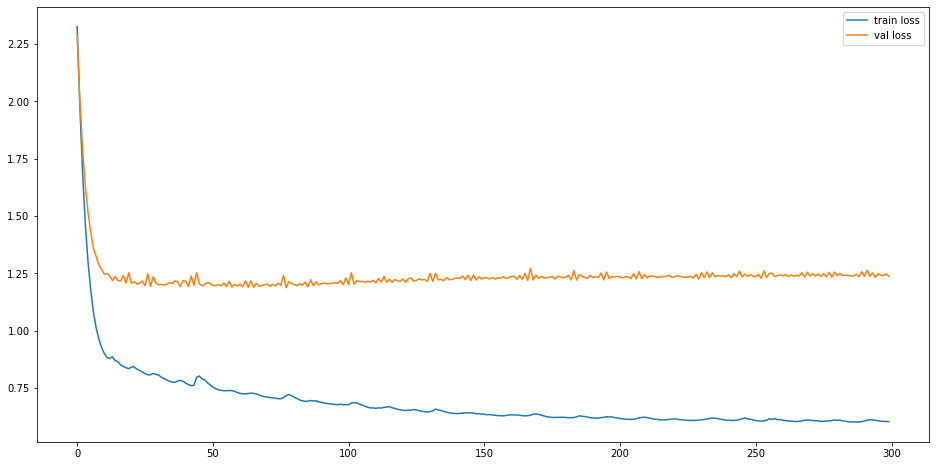

In [56]:
plt.figure(figsize = (16,8))
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend(loc = 'best')
plt.show()

In [75]:
fX_train, fX_test, fY_train, fY_test = train_test_split(X, Y3, test_size = 0.2, shuffle = False, random_state = 666)

In [76]:
ftrain_dataset, ftrain_labels = create_dataset(fX_train, fY_train, seq_len)

In [77]:
ftest_dataset, ftest_labels = create_dataset(fX_test, fY_test, seq_len )

In [78]:
ftrain_batch_dataset = create_batch_dataset(ftrain_dataset, ftrain_labels)

In [79]:
ftest_batch_dataset = create_batch_dataset(ftest_dataset, ftest_labels)

In [80]:
fmodel = Sequential()

fmodel.add(LSTM(279, activation='tanh', batch_input_shape=(None,seq_len,279), return_sequences=True))
#fmodel.add(Dropout(0.3))
fmodel.add(LSTM(220, activation='tanh', return_sequences=True))
#fmodel.add(Dropout(0.3))
fmodel.add(LSTM(180, activation='tanh', return_sequences=True))
#fmodel.add(Dropout(0.3))
#fmodel.add(LSTM(75, activation='relu', return_sequences=True))
fmodel.add(LSTM(147, activation='tanh',  recurrent_regularizer=tf.keras.regularizers.l1(l=0.003),kernel_regularizer=tf.keras.regularizers.l2(l=0.003),bias_regularizer=tf.keras.regularizers.l2(l=0.0001), return_sequences=True))

fmodel.compile(optimizer='adam', loss='mse')
fmodel.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 6, 279)            623844    
_________________________________________________________________
lstm_4 (LSTM)                (None, 6, 220)            440000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 6, 180)            288720    
_________________________________________________________________
lstm_6 (LSTM)                (None, 6, 147)            192864    
Total params: 1,545,428
Trainable params: 1,545,428
Non-trainable params: 0
_________________________________________________________________


In [81]:
checkpoint_file2 = "fbest_model.hdf5"

checkpoint_callback2 = ModelCheckpoint(filepath = checkpoint_file2,
                                     monitor = 'loss',
                                     mode = 'min',
                                     save_best_only=True,
                                     save_weights_only=False)

In [82]:
history2 = fmodel.fit(ftrain_batch_dataset,
                   epochs = 300,
                   validation_data = ftest_batch_dataset,
                   callbacks = [checkpoint_callback2], shuffle = True)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 10.3282 - val_loss: 10.2300
Epoch 2/300
1/1 [==============================] - 0s 156ms/step - loss: 10.0464 - val_loss: 9.9540
Epoch 3/300
1/1 [==============================] - 0s 153ms/step - loss: 9.7699 - val_loss: 9.6840
Epoch 4/300
1/1 [==============================] - 0s 157ms/step - loss: 9.4992 - val_loss: 9.4209
Epoch 5/300
1/1 [==============================] - 0s 171ms/step - loss: 9.2355 - val_loss: 9.1639
Epoch 6/300
1/1 [==============================] - 0s 154ms/step - loss: 8.9775 - val_loss: 8.9130
Epoch 7/300
1/1 [==============================] - 0s 153ms/step - loss: 8.7255 - val_loss: 8.6685
Epoch 8/300
1/1 [==============================] - 0s 156ms/step - loss: 8.4796 - val_loss: 8.4296
Epoch 9/300
1/1 [==============================] - 0s 156ms/step - loss: 8.2389 - val_loss: 8.1972
Epoch 10/300
1/1 [==============================] - 0s 168ms/step - loss: 8.0044 - val_loss: 7.9703
Epoch 11/

1/1 [==============================] - 0s 154ms/step - loss: 0.9630 - val_loss: 1.8486
Epoch 84/300
1/1 [==============================] - 0s 154ms/step - loss: 0.9437 - val_loss: 1.8418
Epoch 85/300
1/1 [==============================] - 0s 157ms/step - loss: 0.9257 - val_loss: 1.8300
Epoch 86/300
1/1 [==============================] - 0s 156ms/step - loss: 0.9106 - val_loss: 1.8173
Epoch 87/300
1/1 [==============================] - 0s 177ms/step - loss: 0.8950 - val_loss: 1.8101
Epoch 88/300
1/1 [==============================] - 0s 153ms/step - loss: 0.8793 - val_loss: 1.8070
Epoch 89/300
1/1 [==============================] - 0s 154ms/step - loss: 0.8659 - val_loss: 1.8011
Epoch 90/300
1/1 [==============================] - 0s 157ms/step - loss: 0.8529 - val_loss: 1.7901
Epoch 91/300
1/1 [==============================] - 0s 147ms/step - loss: 0.8406 - val_loss: 1.7882
Epoch 92/300
1/1 [==============================] - 0s 167ms/step - loss: 0.8277 - val_loss: 1.7858
Epoch 93/300


1/1 [==============================] - 0s 180ms/step - loss: 0.6044 - val_loss: 1.6947
Epoch 246/300
1/1 [==============================] - 0s 153ms/step - loss: 0.6044 - val_loss: 1.6950
Epoch 247/300
1/1 [==============================] - 0s 155ms/step - loss: 0.6044 - val_loss: 1.6948
Epoch 248/300
1/1 [==============================] - 0s 157ms/step - loss: 0.6043 - val_loss: 1.6954
Epoch 249/300
1/1 [==============================] - 0s 156ms/step - loss: 0.6044 - val_loss: 1.6951
Epoch 250/300
1/1 [==============================] - 0s 169ms/step - loss: 0.6043 - val_loss: 1.6951
Epoch 251/300
1/1 [==============================] - 0s 157ms/step - loss: 0.6041 - val_loss: 1.6947
Epoch 252/300
1/1 [==============================] - 0s 152ms/step - loss: 0.6039 - val_loss: 1.6945
Epoch 253/300
1/1 [==============================] - 0s 155ms/step - loss: 0.6036 - val_loss: 1.6940
Epoch 254/300
1/1 [==============================] - 0s 157ms/step - loss: 0.6033 - val_loss: 1.6938
Epoc

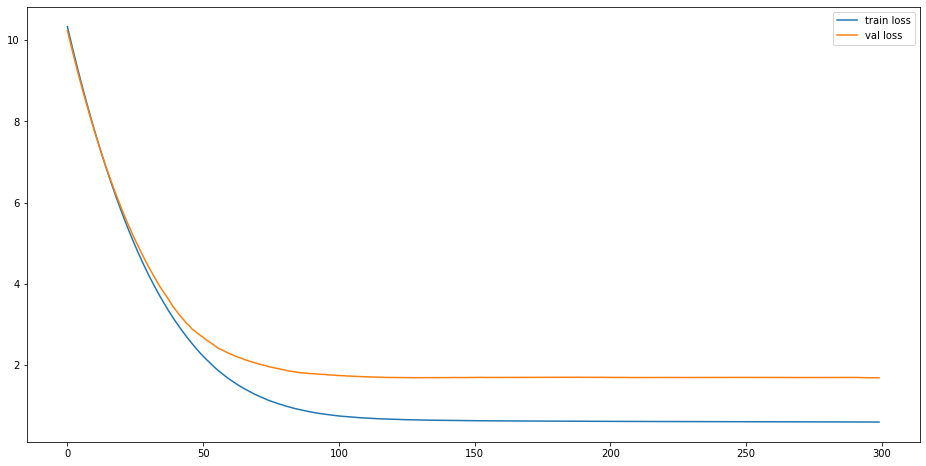

In [83]:
plt.figure(figsize = (16,8))
plt.plot(history2.history['loss'], label = 'train loss')
plt.plot(history2.history['val_loss'], label = 'val loss')
plt.legend(loc = 'best')
plt.show()

In [84]:
X3_dataset, Y4_dataset = create_dataset(X3, Y4, seq_len)

In [90]:
mj0 = model.predict(X2_dataset, verbose = 1)

20/20 [==============================] - 0s 6ms/step


In [91]:
fj0 = fmodel.predict(X3_dataset, verbose = 1)

20/20 [==============================] - 0s 7ms/step


In [92]:
mj0.shape

(615, 6, 132)

In [93]:
fj0.shape

(615, 6, 147)

In [94]:
mj01 = mj0[:,0,:]
mj02 = mj0[610,:,:]
mj0 = np.row_stack((mj01, mj02))
mj0.shape

(621, 132)

In [95]:
fj01 = fj0[:,0,:]
fj02 = fj0[610,:,:]
fj0 = np.row_stack((fj01, fj02))
fj0.shape

(621, 147)

In [96]:
xx = np.column_stack((mj0,fj0))      # yj+1

In [97]:
xx.shape

(621, 279)

In [98]:
e = np.zeros([621,132,12])

In [99]:
e[:,:,0] = mj0

In [100]:
e[:,:,0]

array([[-0.08667512, -0.11673014,  0.20140034, ..., -0.45279288,
        -0.45252019, -0.26866812],
       [-0.2322928 , -0.26760185, -0.55230612, ...,  0.52073771,
         0.2135921 , -0.15655206],
       [-0.43488079, -0.495038  , -0.21864085, ..., -0.20537618,
        -0.3225235 , -0.09201915],
       ...,
       [-0.06633817,  0.14876944,  0.16798182, ...,  0.0571004 ,
        -0.20834403,  0.21555421],
       [ 0.11049494,  0.08285108,  0.30127326, ..., -0.23684835,
         0.11184257,  0.01615029],
       [ 0.03904681,  0.18330082,  0.0748987 , ...,  0.31921795,
         0.2074022 ,  0.17312604]])

In [102]:
for i in range(11):
    xx = DataFrame(xx)
    xx,xx = create_dataset(xx, xx, seq_len)
    mjh = model.predict(xx, verbose = 1)
    mjh01 = mjh[:,0,:]
    mjh02 = mjh[610,:,:]
    mjh = np.row_stack((mjh01, mjh02))
    fjh = fmodel.predict(xx, verbose = 1)
    fjh01 = fjh[:,0,:]
    fjh02 = fjh[610,:,:]
    fjh = np.row_stack((fjh01, fjh02))
    e[:,:,i+1] = mjh
    xx = np.column_stack((mjh,fjh))
    

20/20 [==============================] - 0s 7ms/step


In [103]:
Y2_dataset.shape

(615, 6, 132)

In [104]:
Y20 = Y2_dataset[:,0,:]

In [105]:
Y21 = Y2_dataset[610,:,:]

In [106]:
y0 = np.row_stack((Y20, Y21))

In [107]:
y0.shape

(621, 132)

In [108]:
e.shape

(621, 132, 12)

In [109]:
vyt = np.zeros([621,132])

In [110]:
for i in range(621):
    for j in range(132):
        vyt[i,j] = y0[i,j] - e[i,j,0] 

In [111]:
#save = pd.DataFrame(vyt)
#save.to_csv('vytA2.csv',index=False)

In [112]:
u = np.zeros([610,132,12])

In [113]:
for i in range(12):
    for j in range(610):
        for k in range(132):
            u[j,k,i] = (y0[j+i,k]-e[j,k,i])
            

In [114]:
pd.options.display.float_format = '{:,.16f}'.format

In [115]:
u[:,:,0]

array([[ 0.19340048,  0.32530782,  2.09089489, ..., -6.80839313,
         0.45336815, -0.20671368],
       [ 0.13002637,  0.18381487, -3.63851695, ...,  3.91997637,
        -0.21274414, -0.31882974],
       [-0.02167037, -0.21226786, -0.34184406, ..., -1.01298766,
         0.32337146,  0.00990415],
       ...,
       [-0.35742586, -0.60020662,  0.48544671, ..., -0.83090413,
        -0.03159794,  0.51860569],
       [-0.15849697, -0.29153134, -0.5666981 , ...,  0.06966831,
         0.06651625,  0.6212837 ],
       [ 0.85567808,  2.18973484, -0.74977094, ...,  0.47699619,
         0.23621176,  0.13287094]])

In [116]:
u[:,:,6]

array([[ 0.39537659,  0.59294617,  0.34743848, ...,  0.44032996,
        -1.10225577, -0.44761376],
       [-1.36093963, -1.74888713, -1.2762435 , ..., -0.48396953,
        -1.1334068 , -0.65377085],
       [-1.56621008, -1.9040396 , -3.15267292, ...,  0.87301345,
         1.68080204, -0.1401424 ],
       ...,
       [-0.67353974, -0.9268141 , -0.49818701, ..., -0.18350671,
         0.23055208,  2.15811888],
       [-0.45007803, -0.57872209, -0.93528392, ..., -0.21726133,
        -0.12969888, -0.97701063],
       [-0.58069526, -0.20757314, -0.14776778, ..., -0.32244876,
        -0.64723262,  0.81816437]])

In [126]:
e.shape

(621, 132, 12)

In [127]:
ph = np.zeros([621,132,11])

In [128]:
y0.shape

(621, 132)

In [129]:
for i in range(621):
    for j in range(132):
        for k in range(11):
            ph[i,j,k] = e[i,j,k+1]/e[i,j,k]

In [130]:
ph

array([[[ 2.08965337e+00,  6.21818773e-01, -8.41848473e-01, ...,
         -1.12949376e+00, -1.12698838e+00,  9.59926395e-01],
        [ 1.80812426e+00,  1.57640542e+00, -7.59082483e-02, ...,
          7.70663003e-02,  9.94955543e+00,  8.67990179e-01],
        [-2.34412021e+00, -2.09330989e-01, -4.13347432e+00, ...,
          2.84457943e-01, -2.76792859e-01, -1.33940571e+00],
        ...,
        [-2.88702195e-01, -3.42144318e+00, -3.46811988e-01, ...,
         -4.30613236e+00, -3.08041408e+00, -1.12449998e+00],
        [-8.73461758e-01, -6.51625529e-01, -8.66451909e-01, ...,
          4.18845251e-01,  1.02585390e+00,  2.73116302e+00],
        [-1.37573053e+00,  1.44689642e-01,  4.17082735e+00, ...,
         -1.19816513e-01, -5.24341646e+00,  1.84414232e-01]],

       [[ 1.19965609e+00,  9.57198329e-01,  1.11447450e+00, ...,
          3.36542792e+00,  4.81123447e-01,  1.98327645e+00],
        [ 1.51276045e+00,  1.00090345e+00,  1.07717731e+00, ...,
         -8.63325335e-01,  1.17073159e

In [131]:

ph1 = ph[:,:,0]
save = pd.DataFrame(ph1)
save.to_csv('ph1.csv',index=False)
ph2 = ph[:,:,1]
save = pd.DataFrame(ph2)
save.to_csv('ph2.csv',index=False)
ph3 = ph[:,:,2]
save = pd.DataFrame(ph3)
save.to_csv('ph3.csv',index=False)
ph4 = ph[:,:,3]
save = pd.DataFrame(ph4)
save.to_csv('ph4.csv',index=False)
ph5 = ph[:,:,4]
save = pd.DataFrame(ph5)
save.to_csv('ph5.csv',index=False)
ph6 = ph[:,:,5]
save = pd.DataFrame(ph6)
save.to_csv('ph6.csv',index=False)
ph7 = ph[:,:,6]
save = pd.DataFrame(ph7)
save.to_csv('ph7.csv',index=False)
ph8 = ph[:,:,7]
save = pd.DataFrame(ph8)
save.to_csv('ph8.csv',index=False)
ph9 = ph[:,:,8]
save = pd.DataFrame(ph9)
save.to_csv('ph9.csv',index=False)
ph10 = ph[:,:,9]
save = pd.DataFrame(ph10)
save.to_csv('ph10.csv',index=False)
ph11 = ph[:,:,10]
save = pd.DataFrame(ph11)
save.to_csv('ph11.csv',index=False)


In [132]:
phi = np.zeros([621,132,11])

In [133]:
for i in range(621):
    for j in range(132):
        for k in range(11):
            phi[i,j,k] = (e[i,j,k+1]/y0[i,j])
        
        

In [134]:
phi

array([[[-1.69707524e+00, -1.05527324e+00,  8.88380168e-01, ...,
          8.16734969e-01, -9.20450822e-01, -8.83565039e-01],
        [-1.01191361e+00, -1.59518611e+00,  1.21087783e-01, ...,
         -1.01900128e-01, -1.01386097e+00, -8.80021368e-01],
        [-2.05953666e-01,  4.31124845e-02, -1.78204348e-01, ...,
          3.46247335e-02, -9.58387895e-03,  1.28367022e-02],
        ...,
        [-1.80028853e-02,  6.15958493e-02, -2.13621789e-02, ...,
         -8.58487240e-03,  2.64449618e-02, -2.97373589e-02],
        [ 4.66132474e+02, -3.03743820e+02,  2.63179413e+02, ...,
          9.52670251e+01,  9.77300489e+01,  2.66916695e+02],
        [-7.77511739e-01, -1.12497895e-01, -4.69209297e-01, ...,
          7.88663416e-02, -4.13529074e-01, -7.62606465e-02]],

       [[ 2.72495556e+00,  2.60832291e+00,  2.90690936e+00, ...,
         -2.40629300e+00, -1.15772398e+00, -2.29608671e+00],
        [ 4.83150848e+00,  4.83587352e+00,  5.20909323e+00, ...,
         -1.10790449e+00, -1.29705878e

In [135]:
pd.options.display.float_format = '{:,.16f}'.format

In [136]:
phi[:,:,8]

array([[ 8.16734969e-01, -1.01900128e-01,  3.46247335e-02, ...,
        -8.58487240e-03,  9.52670251e+01,  7.88663416e-02],
       [-2.40629300e+00, -1.10790449e+00, -5.79559995e-02, ...,
        -4.15956373e-02,  1.65772788e+02, -7.19396239e-01],
       [ 4.52907267e-04,  1.30797877e-01, -1.16130814e-01, ...,
        -2.24010289e-02,  2.29690433e+02, -1.24325669e+00],
       ...,
       [-2.28610226e-01,  1.50293235e-01, -2.05344459e-01, ...,
        -1.05611890e+00, -9.31410168e-02,  1.35453967e-01],
       [ 5.06195149e-01,  1.93231545e+00,  3.71565330e-01, ...,
         1.60638730e+00, -1.54502022e+00,  1.95810030e-01],
       [-1.37519500e+00, -1.65833012e-02,  9.00447808e-01, ...,
         2.63030223e-01,  9.16899057e-01, -6.01046283e-02]])

In [137]:
''''''
phi1 = phi[:,:,0]
save = pd.DataFrame(phi1)
save.to_csv('phi1.csv',index=False)
phi2 = phi[:,:,1]
save = pd.DataFrame(phi2)
save.to_csv('phi2.csv',index=False)
phi3 = phi[:,:,2]
save = pd.DataFrame(phi3)
save.to_csv('phi3.csv',index=False)
phi4 = phi[:,:,3]
save = pd.DataFrame(phi4)
save.to_csv('phi4.csv',index=False)
phi5 = phi[:,:,4]
save = pd.DataFrame(phi5)
save.to_csv('phi5.csv',index=False)
phi6 = phi[:,:,5]
save = pd.DataFrame(phi6)
save.to_csv('phi6.csv',index=False)
phi7 = phi[:,:,6]
save = pd.DataFrame(phi7)
save.to_csv('phi7.csv',index=False)
phi8 = phi[:,:,7]
save = pd.DataFrame(phi8)
save.to_csv('phi8.csv',index=False)
phi9 = phi[:,:,8]
save = pd.DataFrame(phi9)
save.to_csv('phi9.csv',index=False)
phi10 = phi[:,:,9]
save = pd.DataFrame(phi10)
save.to_csv('phi10.csv',index=False)
phi11 = phi[:,:,10]
save = pd.DataFrame(phi11)
save.to_csv('phi11.csv',index=False)
''''''

''